Text(0, 0.5, 'Predictions')

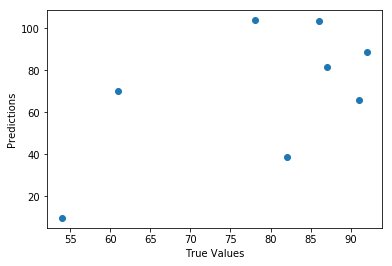

In [5]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

df = pd.read_excel(r"C:\Users\Joel\Desktop\MovieData.xlsx")
df = pd.DataFrame(df,columns=['Gross USA','Opening Weekend USA','Worldwide Gross','Budget','Metascore','IMDb Rating','Tomatometer','Audience Score'])

X = df[['Gross USA','Opening Weekend USA','Worldwide Gross','Budget','Metascore','IMDb Rating','Tomatometer']]
y = df['Audience Score']

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.5)

regr = linear_model.LinearRegression()
model = regr.fit(X_train, y_train)
predictions = regr.predict(X_test)

plt.scatter(y_test, predictions)
plt.xlabel("True Values")
plt.ylabel("Predictions")